In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')
df = df.dropna()
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [22]:
jocheon = df[df['정점명'].isin(['조천1', '조천2', '조천3'])].drop(['정점명'], axis=1)

In [23]:
jocheon

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
23,2021-11-18,18.0,10.0,1,18.06,33.66,8.11,8.58,0.38,10.85,...,0.54,0,0,1,0,0,1,2021,11,18
24,2021-11-18,44.0,9.0,1,18.23,33.60,8.09,9.02,1.48,5.61,...,0.59,0,0,1,0,0,1,2021,11,18
25,2021-11-18,30.0,10.0,1,18.19,33.51,8.10,8.42,1.56,9.23,...,0.53,0,0,1,0,0,1,2021,11,18
33,2021-11-18,18.0,10.0,1,18.03,33.65,8.10,8.27,0.29,15.22,...,0.66,0,0,1,0,1,0,2021,11,18
34,2021-11-18,44.0,9.0,1,18.18,33.77,8.08,8.07,1.30,4.28,...,0.51,0,0,1,0,1,0,2021,11,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2011-02-22,38.0,5.2,2,13.24,34.58,8.10,9.80,0.67,25.80,...,0.84,0,1,0,0,0,1,2011,2,22
1620,2011-02-22,15.0,6.5,2,13.23,34.55,8.10,9.58,1.09,6.30,...,0.44,0,1,0,0,0,1,2011,2,22
1629,2011-02-22,11.0,5.0,2,13.09,34.60,8.10,9.52,0.29,29.40,...,0.44,0,1,0,0,1,0,2011,2,22
1630,2011-02-22,38.0,5.2,2,13.14,34.58,8.10,9.45,1.11,6.80,...,0.84,0,1,0,0,1,0,2011,2,22


In [24]:
jocheon.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

In [25]:
year_avg = jocheon.groupby('년')['수온'].mean()

year_avg

년
2011    18.207083
2012    16.991667
2013    18.252500
2014    17.674583
2015    17.947500
2016    17.565000
2017    18.717500
2018    17.321667
2019    19.440417
2020    18.234583
2021    18.489583
Name: 수온, dtype: float64

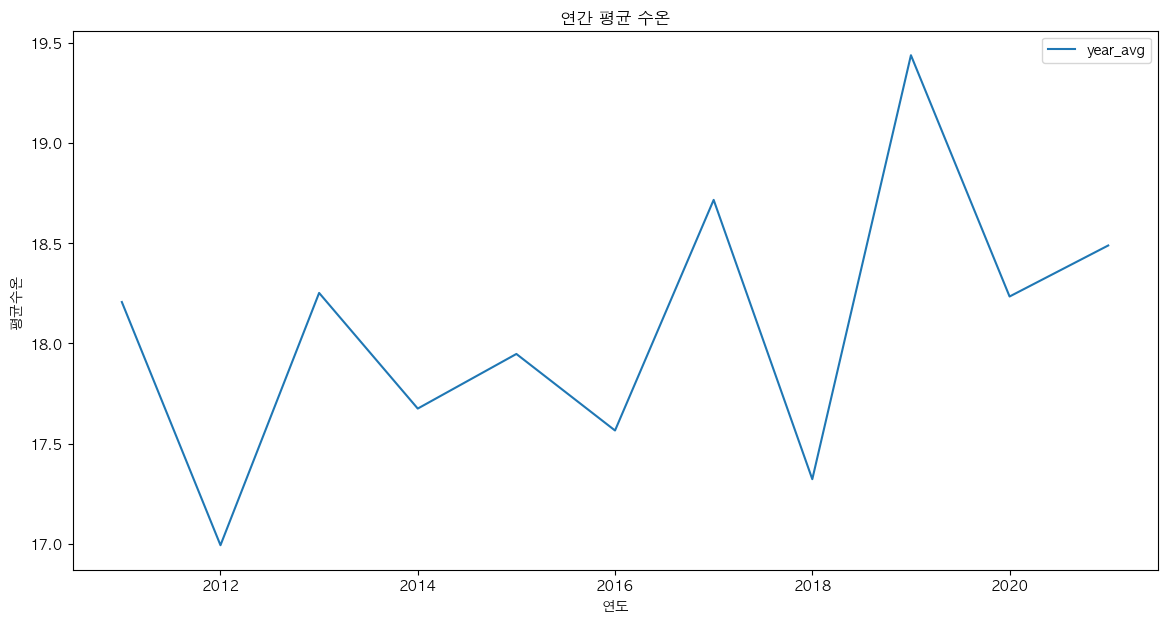

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(year_avg, label='year_avg')
plt.title('연간 평균 수온')
plt.xlabel('연도')
plt.ylabel('평균수온')
plt.legend()
plt.show()

In [27]:
month_avg = jocheon.groupby(['년', '월'])['수온'].mean()

month_avg

년     월 
2011  2     13.173333
      5     15.703333
      8     22.946667
      11    21.005000
2012  2     13.116667
      5     16.071667
      8     21.786667
2013  2     12.920000
      5     16.708333
      8     23.528333
      11    19.853333
2014  2     14.183333
      5     18.181667
      8     20.575000
      11    17.758333
2015  2     13.516667
      5     16.595000
      8     21.920000
      11    19.758333
2016  2     13.415000
      5     16.216667
      8     21.645000
      11    18.983333
2017  2     14.171667
      5     15.323333
      8     24.433333
      11    20.941667
2018  2     13.711667
      5     15.966667
      8     20.610000
      11    18.998333
2019  2     14.908333
      5     16.680000
      8     25.390000
      11    20.783333
2020  2     14.851667
      5     16.120000
      8     23.201667
      11    18.765000
2021  2     14.880000
      5     18.103333
      8     22.830000
      11    18.145000
Name: 수온, dtype: float64

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


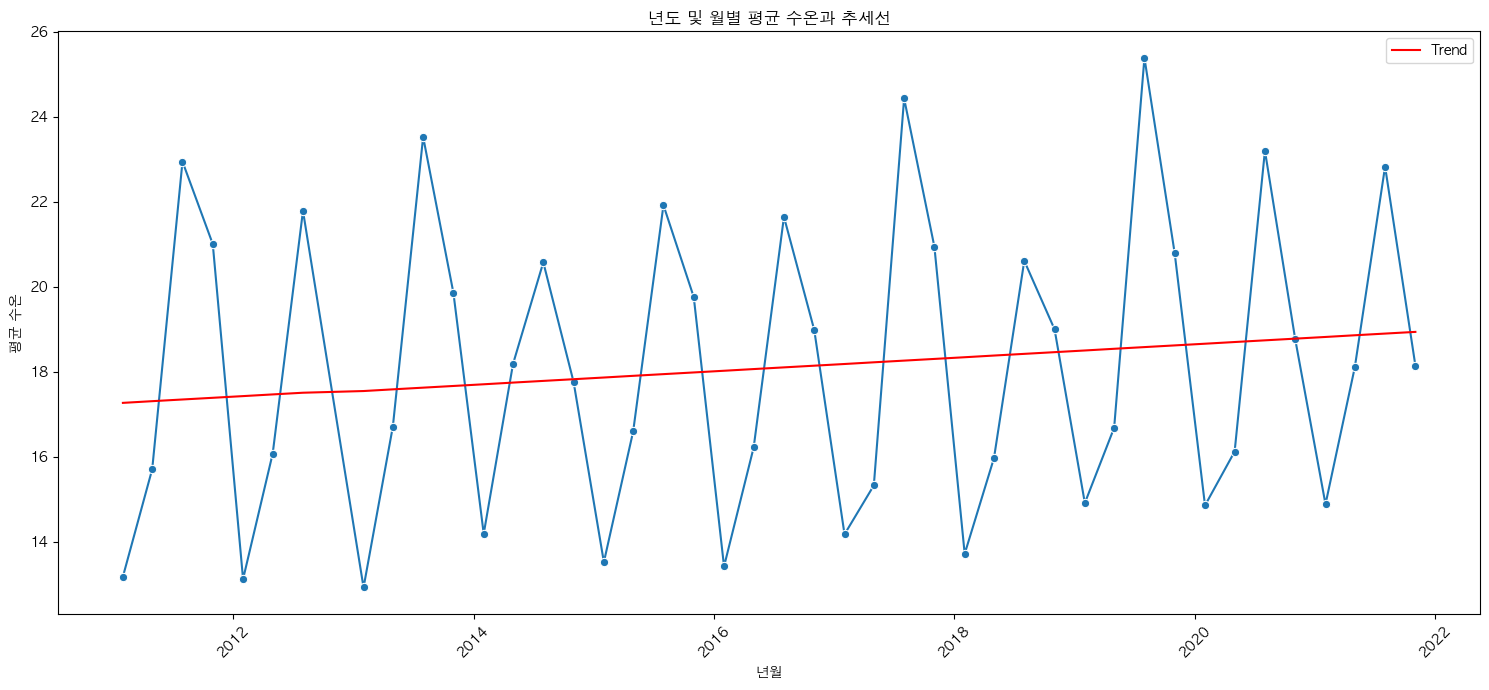

In [28]:
from sklearn.linear_model import LinearRegression

monthly_avg_temp_df = month_avg.reset_index()
monthly_avg_temp_df['년월'] = monthly_avg_temp_df['년'].astype(str) + '-' + monthly_avg_temp_df['월'].astype(str)
monthly_avg_temp_df['년월'] = pd.to_datetime(monthly_avg_temp_df['년월'])

# 선 그래프 그리기
plt.figure(figsize=(15, 7))
sns.lineplot(x='년월', y='수온', data=monthly_avg_temp_df, marker='o')

# 추세선 추가하기
# 날짜 데이터를 숫자로 변환 (LinearRegression을 위해)
X = np.array(monthly_avg_temp_df.index).reshape(-1, 1)
y = monthly_avg_temp_df['수온']

# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 추세선 계산
trend = lin_reg.predict(X)

# 추세선 그리기
plt.plot(monthly_avg_temp_df['년월'], trend, label='Trend', color='red')

# 그래프 설정
plt.title('년도 및 월별 평균 수온과 추세선')
plt.xlabel('년월')
plt.ylabel('평균 수온')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [29]:
train_df = jocheon[jocheon['년'] < 2021].drop('측정 일자', axis = 1)

test_df = jocheon[jocheon['년'] == 2021].drop('측정 일자', axis = 1)

X_train = train_df.drop('수온', axis=1)
y_train = train_df['수온']

X_test = test_df.drop('수온', axis=1)
y_test = test_df['수온']



In [30]:
train_df

,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
163,17.0,9.5,2,18.36,32.44,8.36,8.61,1.59,1.90,1.33,...,1.85,0,0,1,0,0,1,2020,11,9
164,42.0,9.4,2,18.28,32.26,8.37,8.51,1.04,11.63,1.50,...,2.96,0,0,1,0,0,1,2020,11,9
165,27.0,9.5,2,18.25,32.19,8.35,8.38,1.31,0.18,1.47,...,2.62,0,0,1,0,0,1,2020,11,9
182,17.0,9.5,2,18.32,32.44,8.35,8.37,1.79,6.36,2.30,...,1.51,0,0,1,0,1,0,2020,11,9
183,42.0,9.4,2,19.73,33.25,8.29,8.35,1.51,10.46,1.51,...,2.42,0,0,1,0,1,0,2020,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,38.0,5.2,2,13.24,34.58,8.10,9.80,0.67,25.80,3.30,...,0.84,0,1,0,0,0,1,2011,2,22
1620,15.0,6.5,2,13.23,34.55,8.10,9.58,1.09,6.30,3.10,...,0.44,0,1,0,0,0,1,2011,2,22
1629,11.0,5.0,2,13.09,34.60,8.10,9.52,0.29,29.40,2.40,...,0.44,0,1,0,0,1,0,2011,2,22
1630,38.0,5.2,2,13.14,34.58,8.10,9.45,1.11,6.80,3.10,...,0.84,0,1,0,0,1,0,2011,2,22


In [31]:
test_df

,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,아질산성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
23,18.0,10.0,1,18.06,33.66,8.11,8.58,0.38,10.85,5.80,...,0.54,0,0,1,0,0,1,2021,11,18
24,44.0,9.0,1,18.23,33.60,8.09,9.02,1.48,5.61,5.60,...,0.59,0,0,1,0,0,1,2021,11,18
25,30.0,10.0,1,18.19,33.51,8.10,8.42,1.56,9.23,4.70,...,0.53,0,0,1,0,0,1,2021,11,18
33,18.0,10.0,1,18.03,33.65,8.10,8.27,0.29,15.22,4.72,...,0.66,0,0,1,0,1,0,2021,11,18
34,44.0,9.0,1,18.18,33.77,8.08,8.07,1.30,4.28,5.85,...,0.51,0,0,1,0,1,0,2021,11,18
35,30.0,10.0,1,18.18,33.61,8.08,8.82,1.01,9.66,4.13,...,0.69,0,0,1,0,1,0,2021,11,18
44,18.0,9.0,1,25.39,30.94,8.25,7.82,1.67,4.40,1.30,...,1.61,0,0,1,0,0,1,2021,8,31
45,31.0,13.0,1,25.77,30.64,8.20,7.71,1.37,13.40,1.00,...,0.42,0,0,1,0,0,1,2021,8,31
46,28.0,10.0,2,25.73,30.76,8.23,7.64,1.78,32.70,1.30,...,0.49,0,0,1,0,0,1,2021,8,31
58,18.0,9.0,1,21.67,32.67,8.14,8.39,2.20,5.30,5.00,...,1.13,0,0,1,0,1,0,2021,8,31


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE : ", mae)


MAE :  0.5149500000000038


In [33]:
predictions

array([17.7363, 17.8204, 18.384 , 17.7878, 17.634 , 18.4867, 24.8267,
       26.5239, 26.3208, 18.1401, 17.3802, 17.8233, 18.2146, 18.2433,
       18.1973, 18.1837, 18.2155, 18.1527, 14.8287, 14.8127, 14.763 ,
       14.7824, 14.8547, 14.8936])

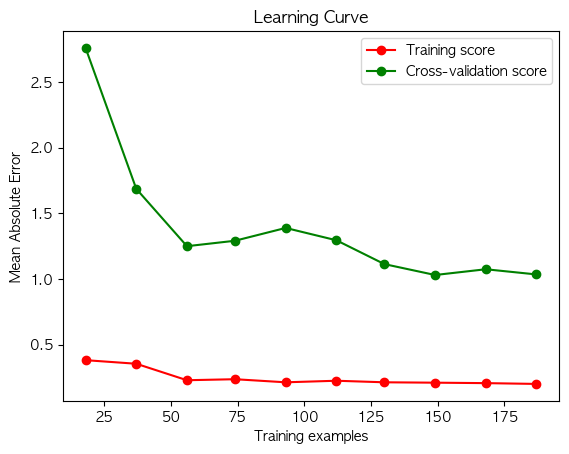

In [34]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), 
    X_train, 
    y_train, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10), 
    scoring='neg_mean_absolute_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.show()


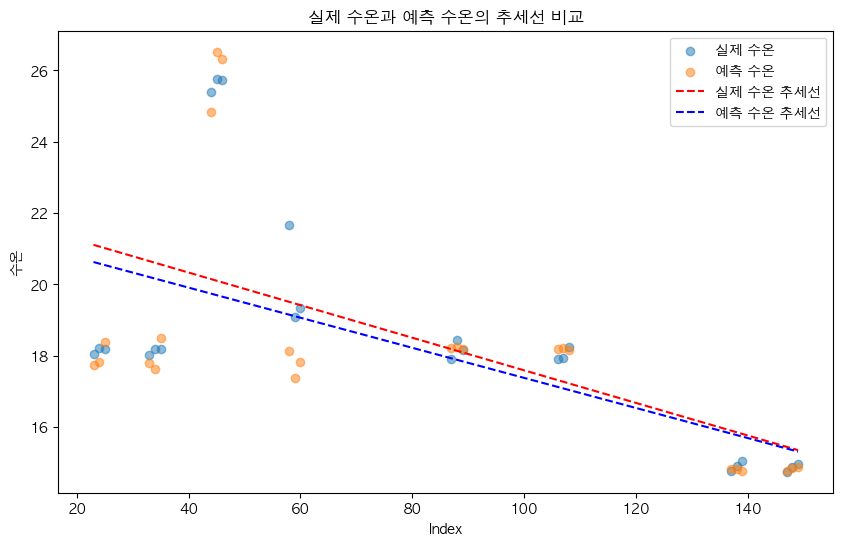

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 값에 대한 추세선 계산
z = np.polyfit(y_test.index, y_test, 1)
p = np.poly1d(z)

# 예측 값에 대한 추세선 계산
z_pred = np.polyfit(y_test.index, predictions, 1)
p_pred = np.poly1d(z_pred)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='실제 수온', alpha=0.5)
plt.scatter(y_test.index, predictions, label='예측 수온', alpha=0.5)

# 추세선 그리기
plt.plot(y_test.index, p(y_test.index), "r--", label='실제 수온 추세선')
plt.plot(y_test.index, p_pred(y_test.index), "b--", label='예측 수온 추세선')

plt.title('실제 수온과 예측 수온의 추세선 비교')
plt.xlabel('Index')
plt.ylabel('수온')
plt.legend()
plt.show()


In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)

MAE :  2.885666666666667


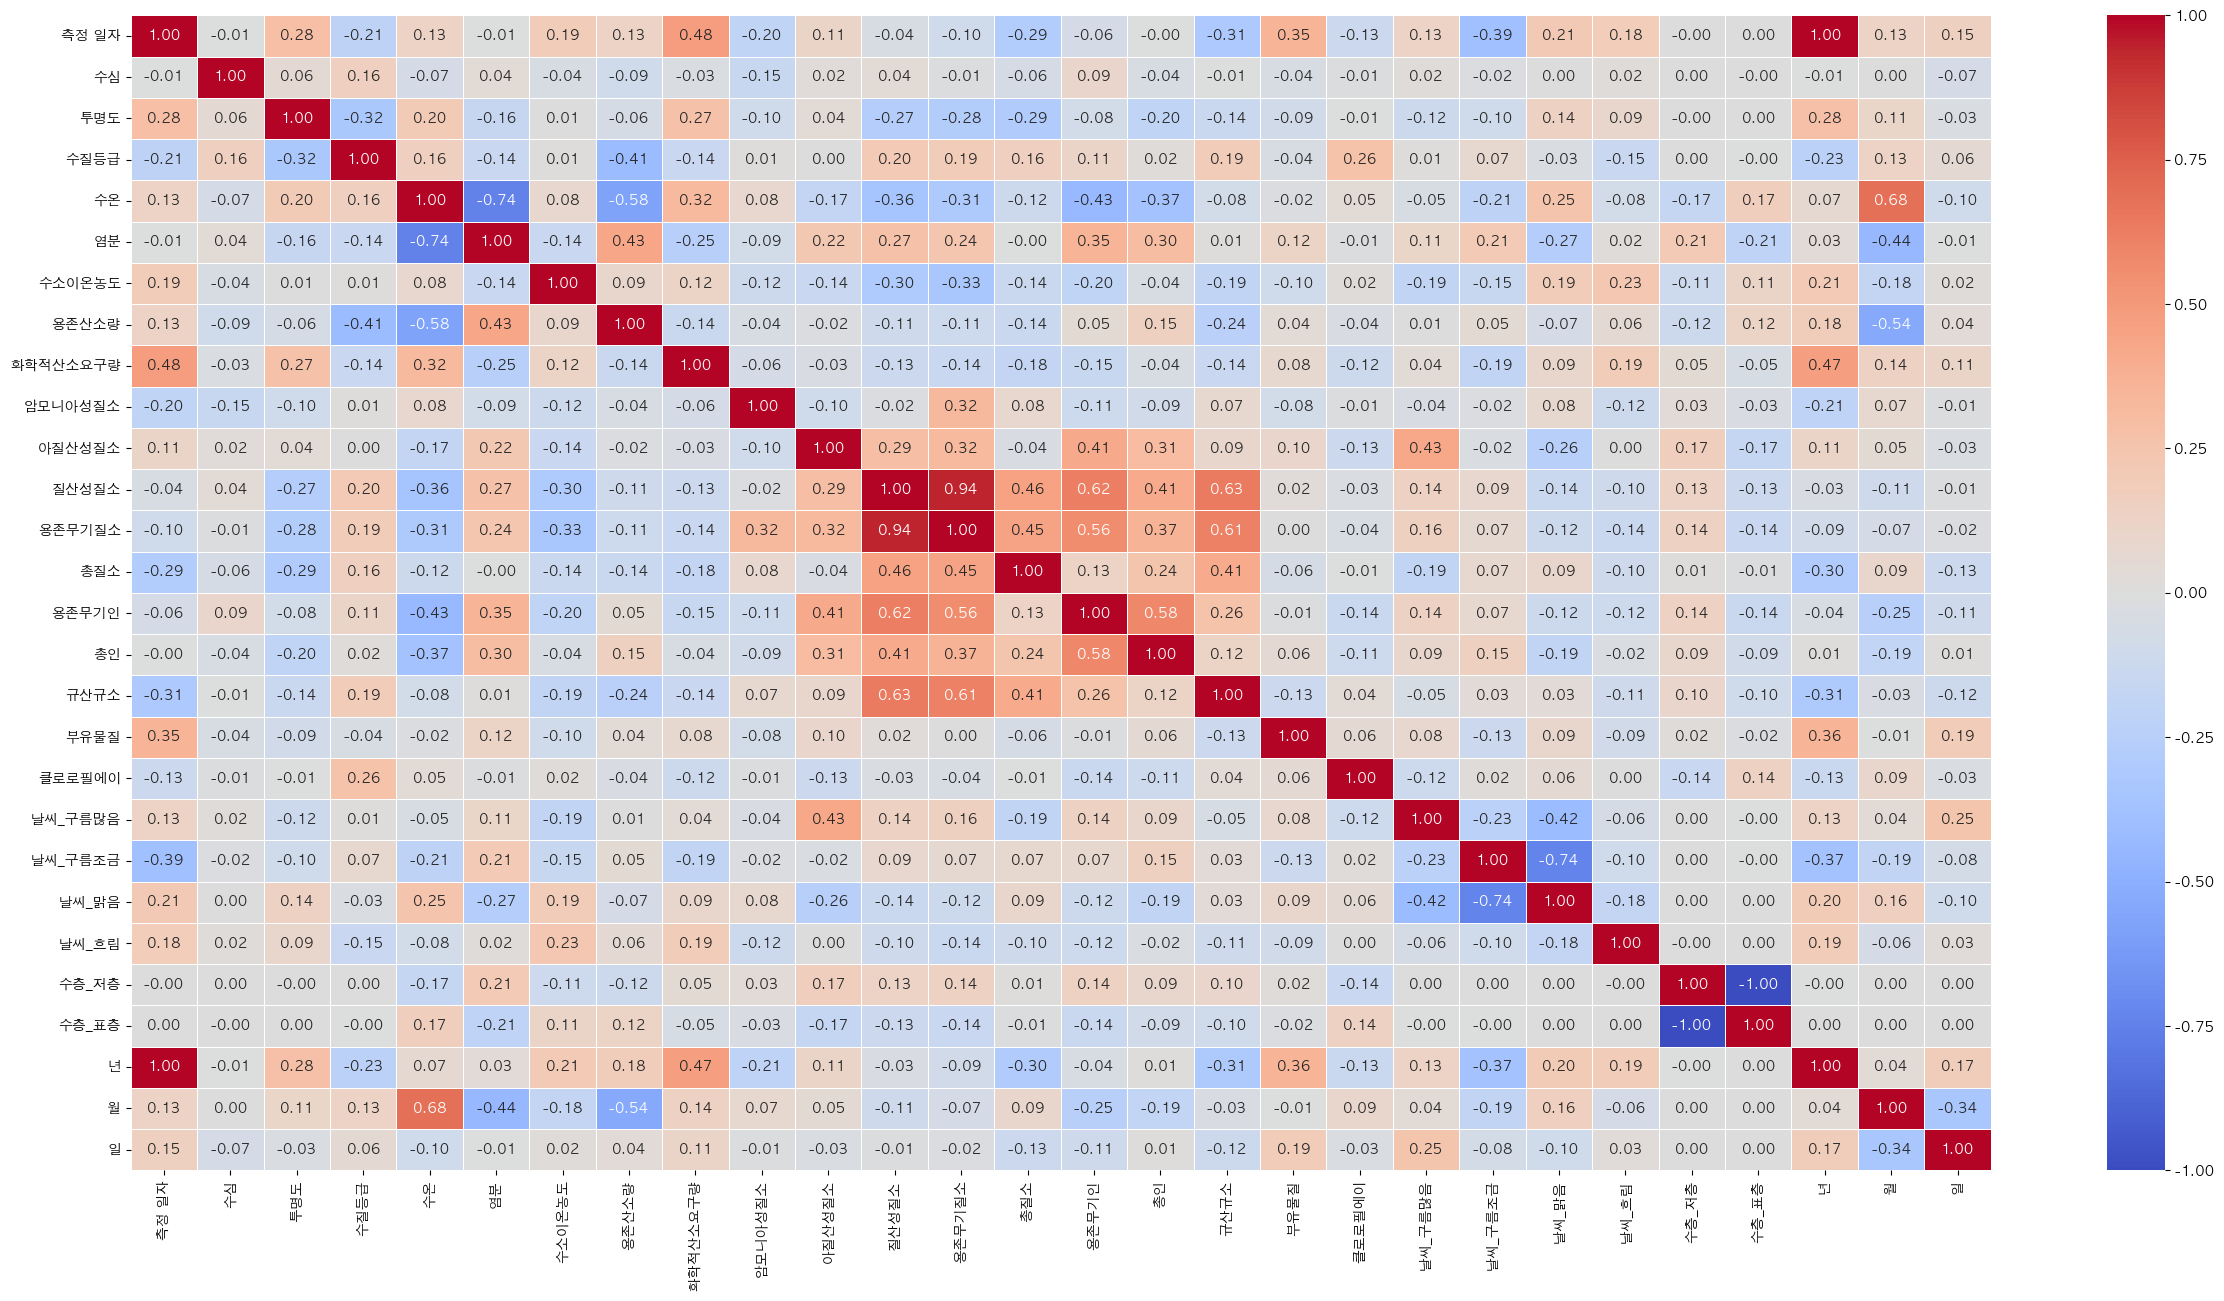

In [37]:
jocheoncorr = jocheon.corr()


plt.figure(figsize=(30, 15))
sns.heatmap(jocheoncorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [38]:
temp = jocheon.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [39]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
23,18.06,0,0,1,0,11
24,18.23,0,0,1,0,11
25,18.19,0,0,1,0,11
33,18.03,0,0,1,0,11
34,18.18,0,0,1,0,11
...,...,...,...,...,...,...
1619,13.24,0,1,0,0,2
1620,13.23,0,1,0,0,2
1629,13.09,0,1,0,0,2
1630,13.14,0,1,0,0,2


In [40]:
tempcorrs=temp.corr()


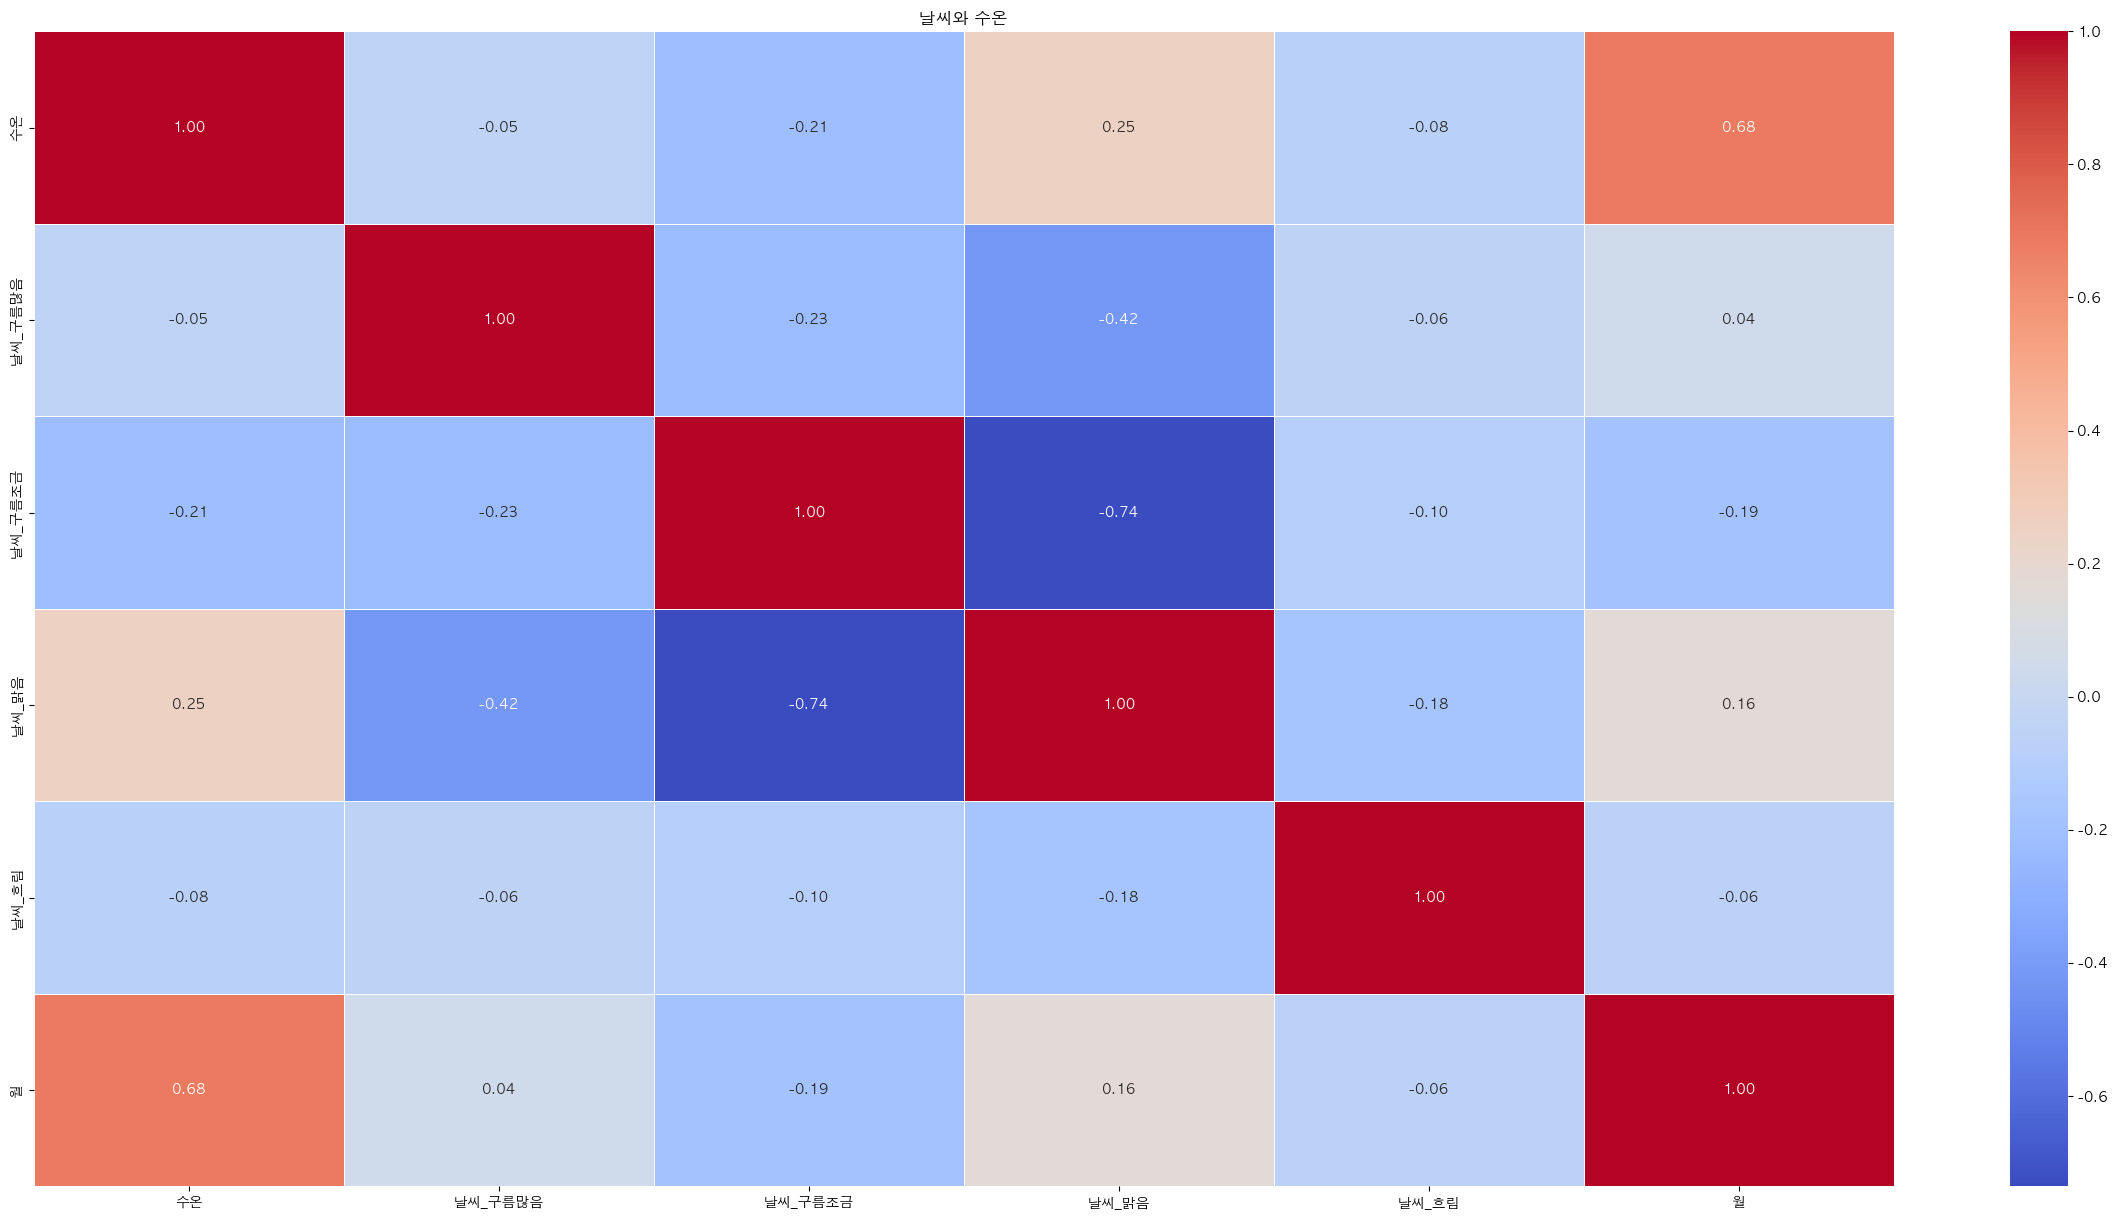

In [41]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

In [42]:
che = jocheon.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [43]:
checorrs = che.corr()

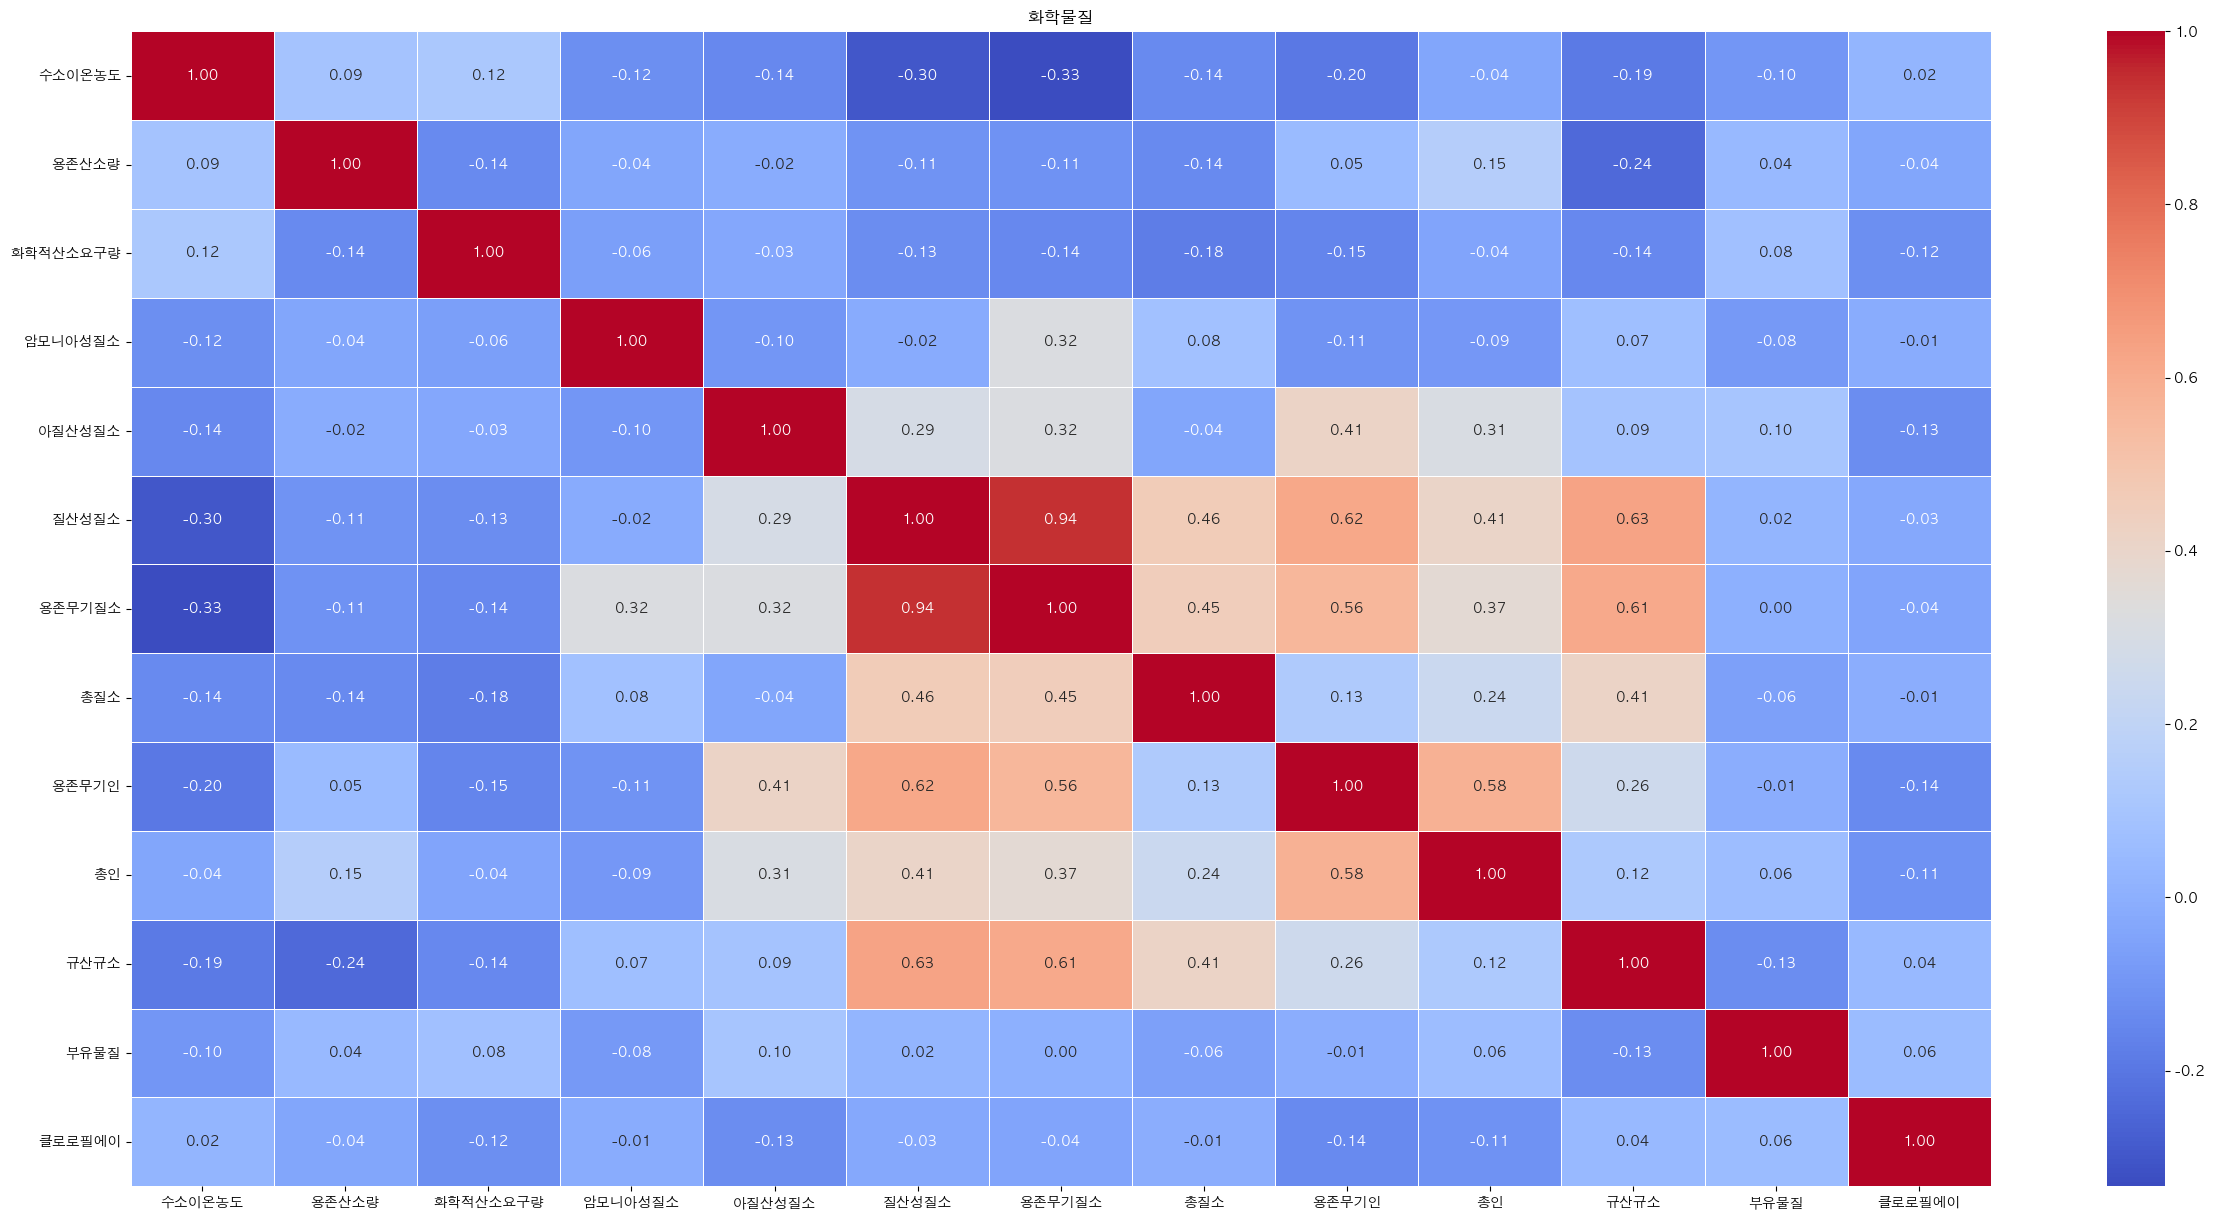

In [44]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

In [45]:
che2 = jocheon.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [46]:
che2corrs = che2.corr()

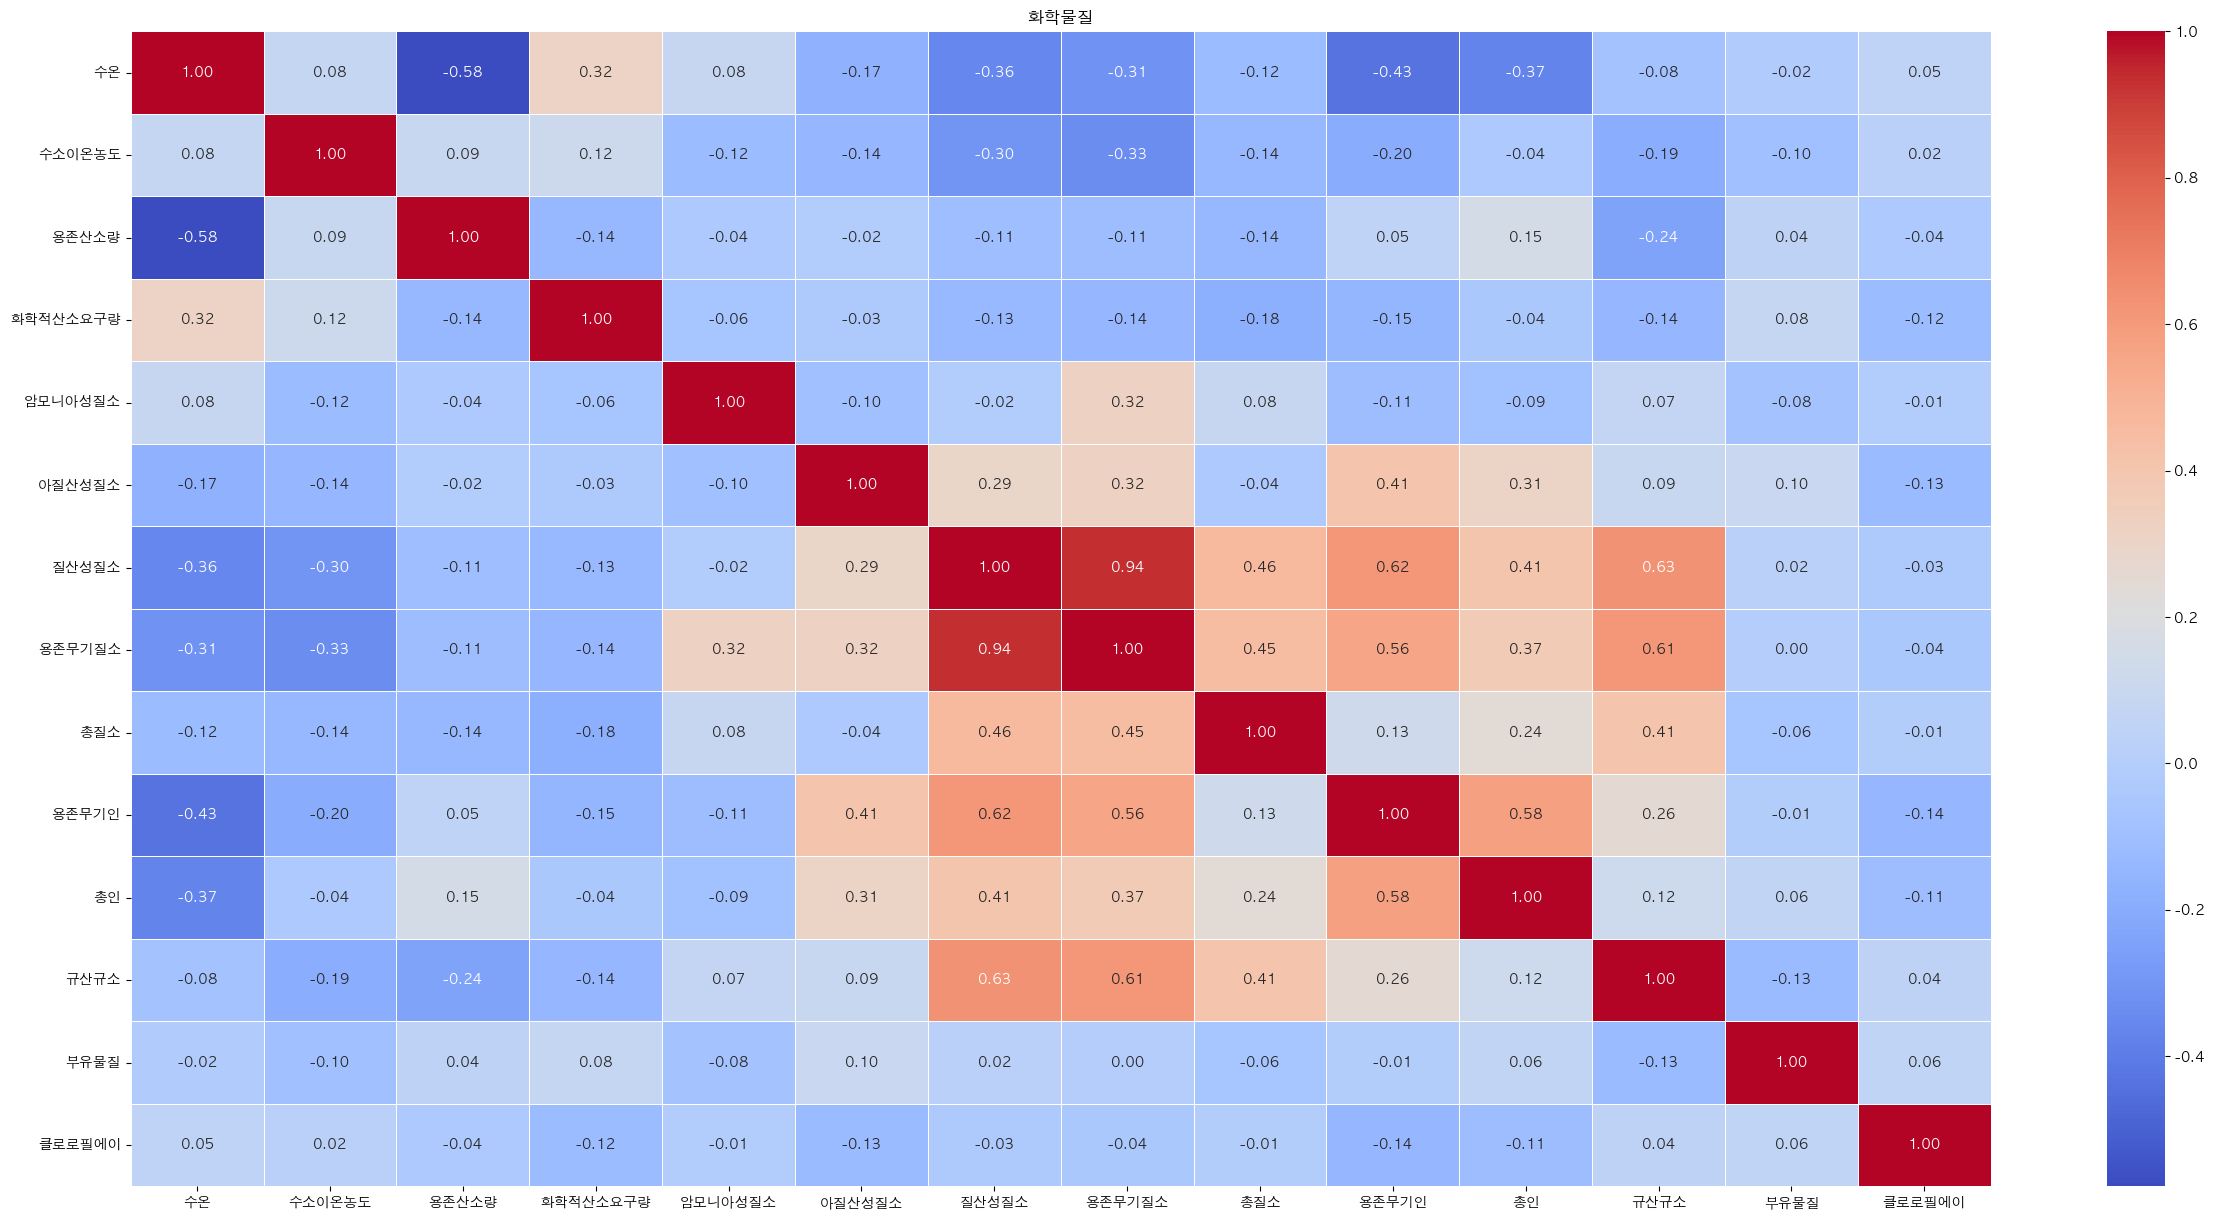

In [47]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/731925867.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/731925867.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/731925867.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/731925867.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/731925867.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/731925867.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/73192

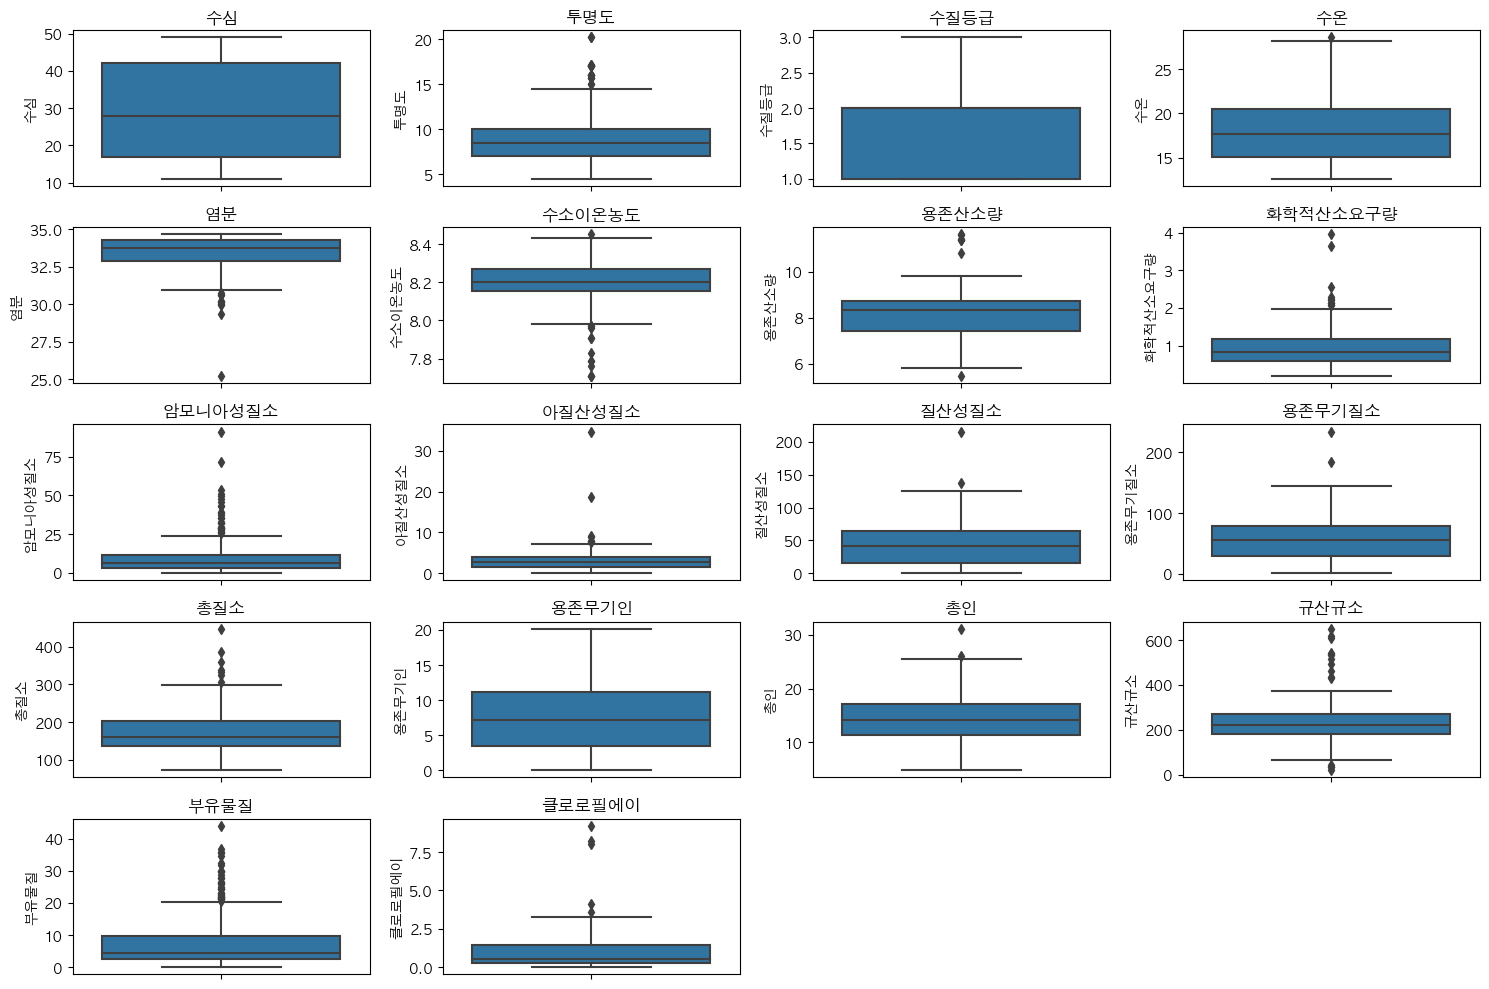

In [48]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=jocheon[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2320251270.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2320251270.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2320251270.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2320251270.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2320251270.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2320251270.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/23202

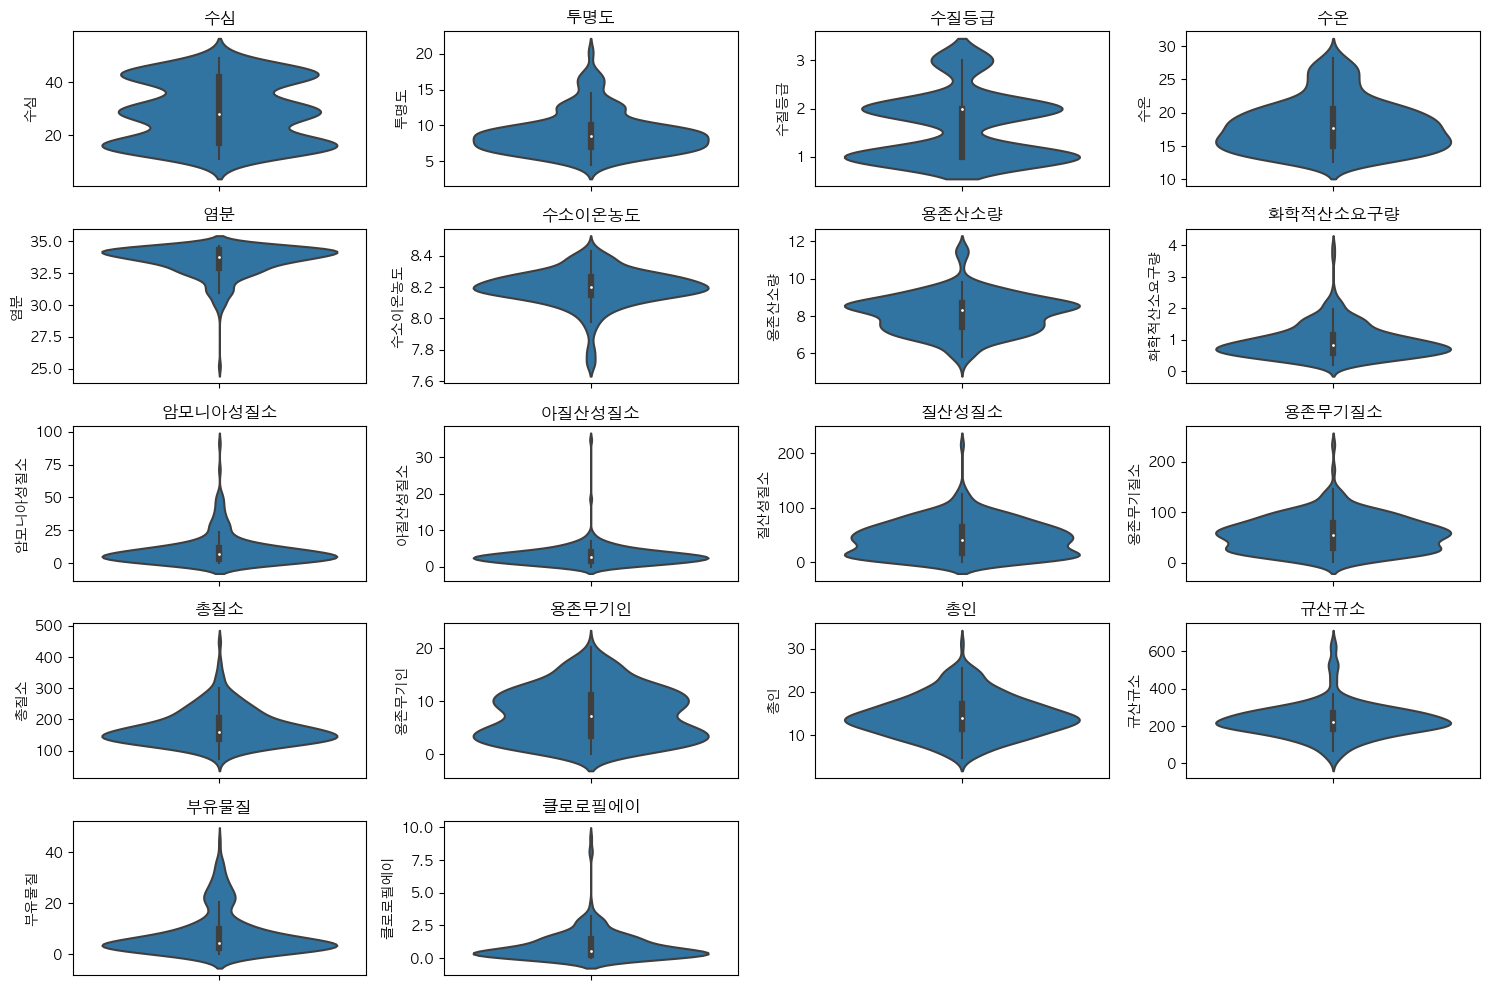

In [49]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=jocheon[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2871005441.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2871005441.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2871005441.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2871005441.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2871005441.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/2871005441.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_88942/28710

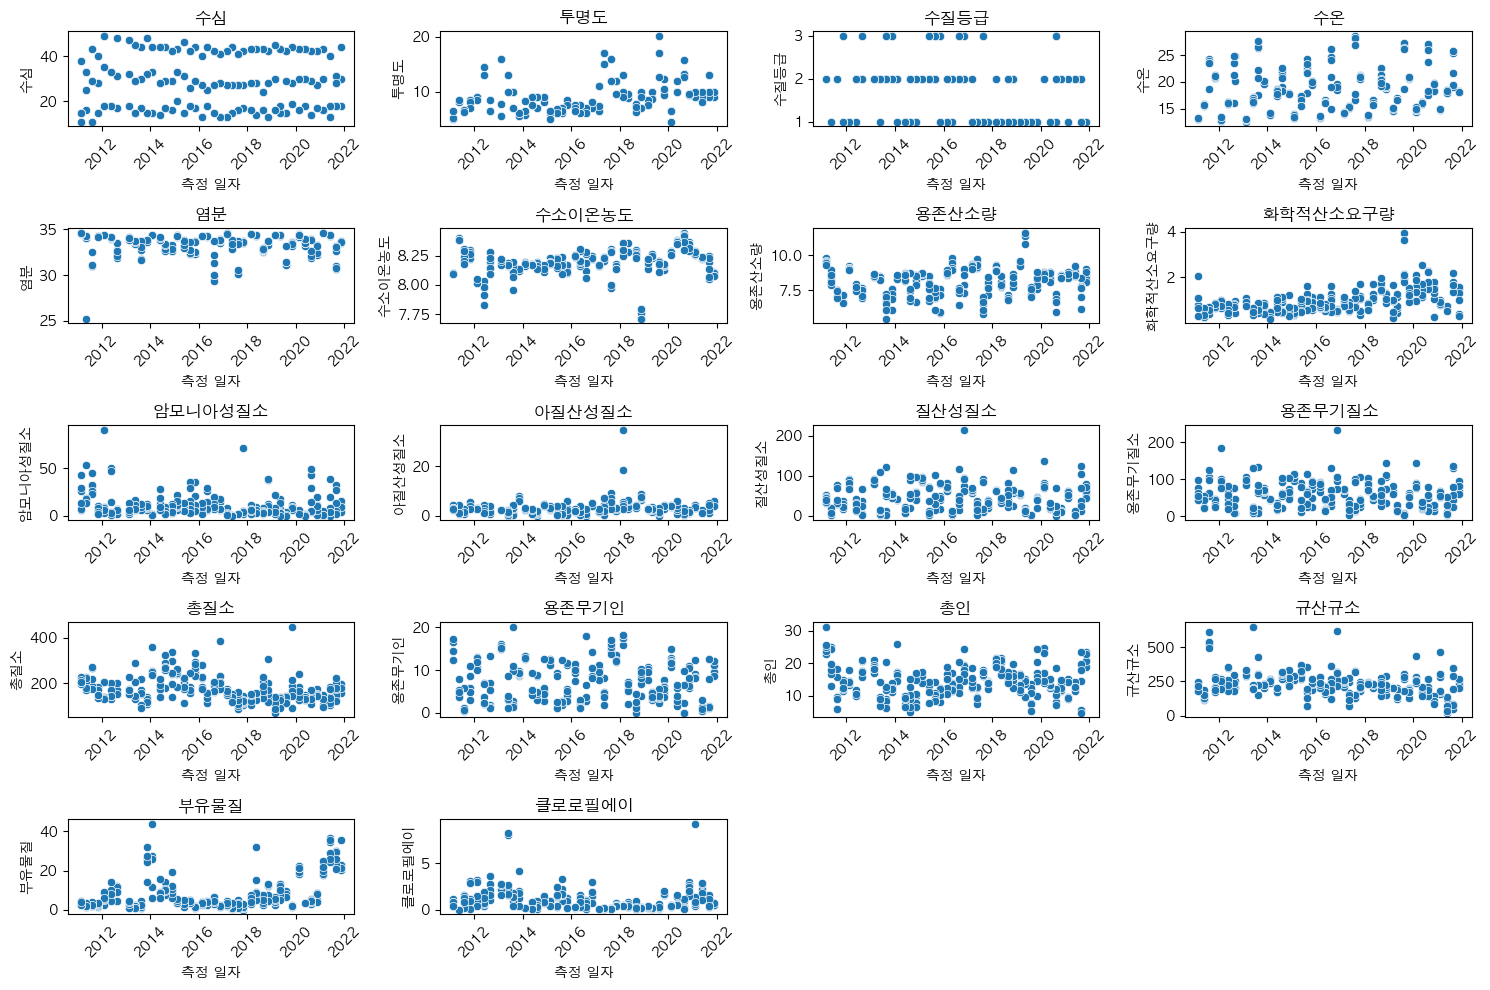

In [50]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=jocheon, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

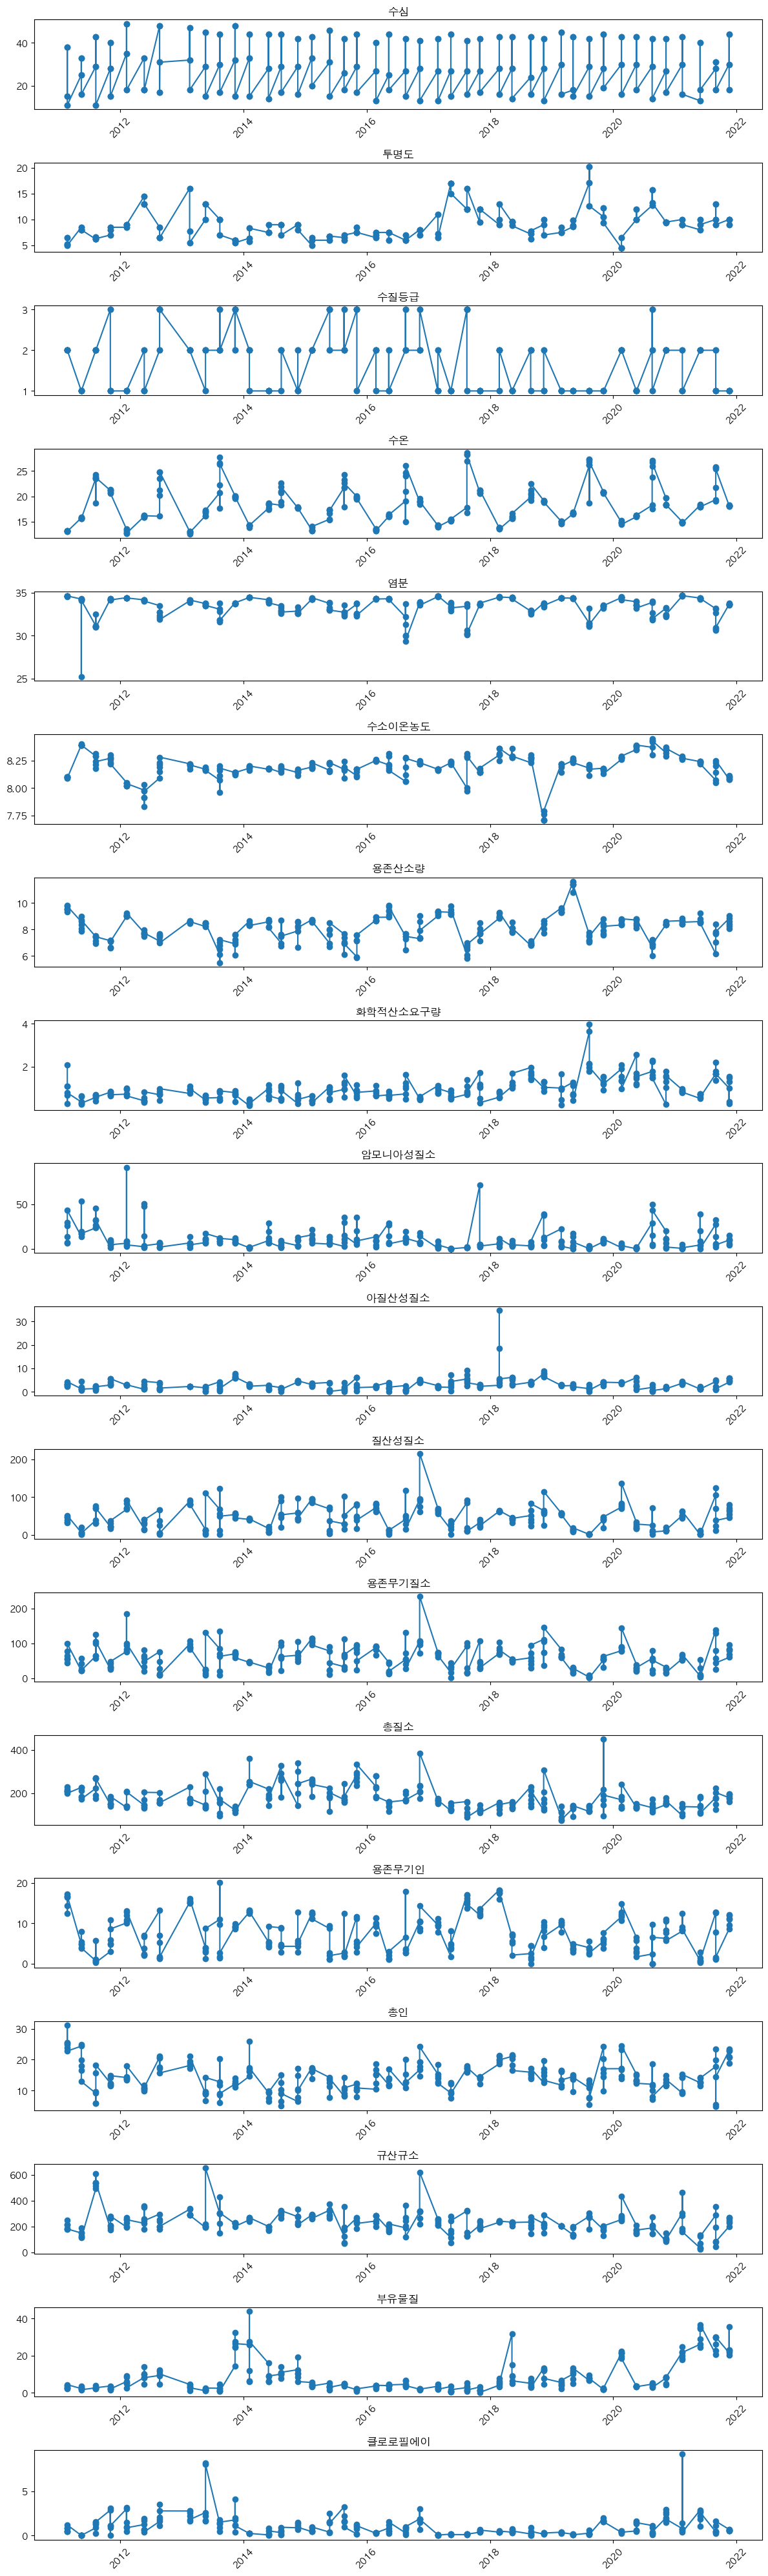

In [51]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(jocheon['측정 일자'], jocheon[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


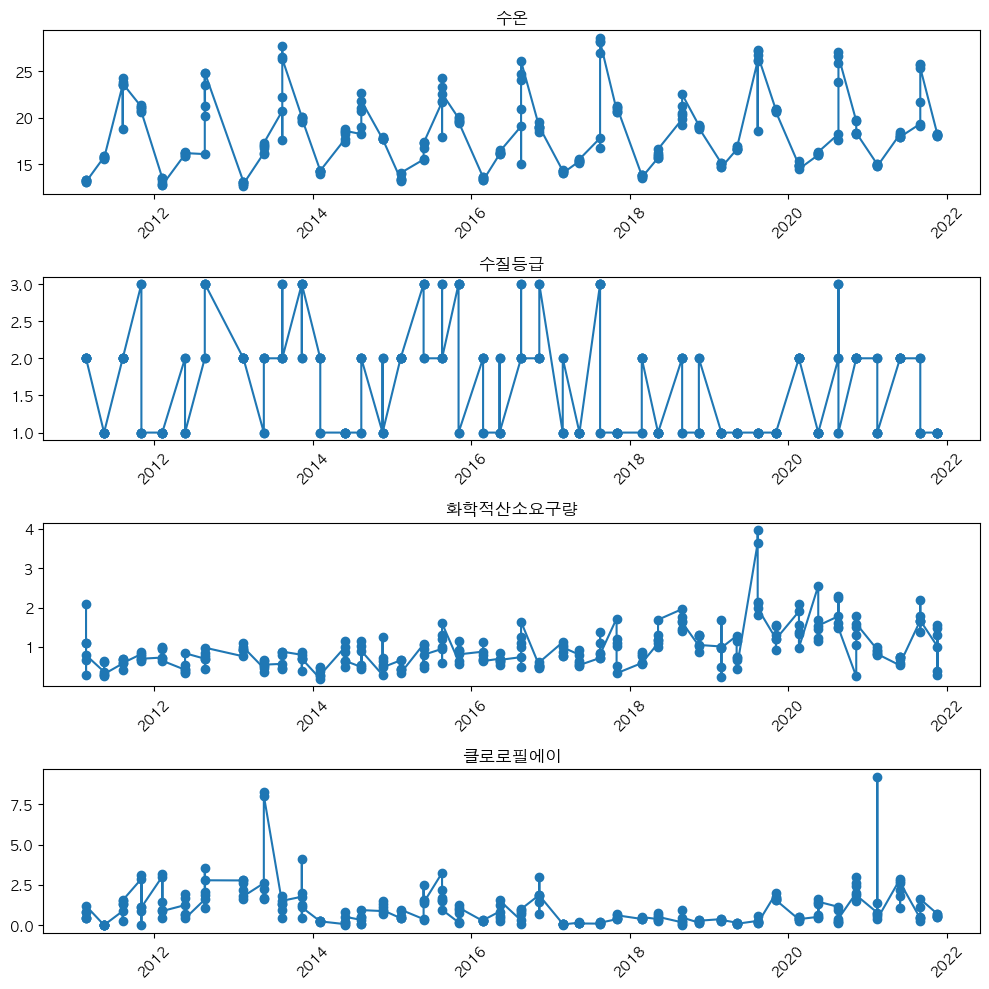

In [54]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(jocheon['측정 일자'], jocheon[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features_for_standardization = jocheon.drop(['측정 일자','년','월','일'], axis=1).select_dtypes(include=['float64', 'int64'])

standardized_features = scaler.fit_transform(numerical_features_for_standardization)

standardized_features_df = pd.DataFrame(standardized_features, columns=numerical_features_for_standardization.columns)

jocheon = pd.concat([jocheon['측정 일자'], standardized_features_df], axis=1)

jocheon.head()


,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,총인,규산규소,부유물질,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층
23,2021-11-18,0.118869,0.338248,0.506033,-0.823810,0.983980,0.724826,0.507654,-0.037530,-0.807208,...,-1.130206,0.805026,1.648363,-0.176382,-0.362738,-0.634172,0.862116,-0.154303,1.0,-1.0
24,2021-11-18,-1.020234,0.167269,0.506033,0.067707,-0.831556,1.399326,0.459370,1.230439,-0.687201,...,-0.181346,-1.460002,0.013891,0.753024,-0.362738,-0.634172,0.862116,-0.154303,-1.0,1.0
25,2021-11-18,1.170348,0.133073,0.506033,0.046730,-0.981463,1.483639,0.362803,0.173798,0.123680,...,0.105468,-1.391701,0.049423,1.708247,-0.362738,-0.634172,0.862116,-0.154303,-1.0,1.0
33,2021-11-18,-1.283104,1.432519,-0.944596,1.494136,-0.640009,1.905201,-1.230564,2.459984,-0.565527,...,-0.923182,-0.218937,-0.388804,-0.649690,-0.362738,-0.634172,0.862116,-0.154303,1.0,-1.0
34,2021-11-18,1.170348,2.287417,1.956662,-0.147306,0.442651,0.893451,-2.080360,1.057534,-0.452187,...,0.901216,0.439558,-0.501322,-0.744352,-0.362738,-0.634172,0.862116,-0.154303,1.0,-1.0


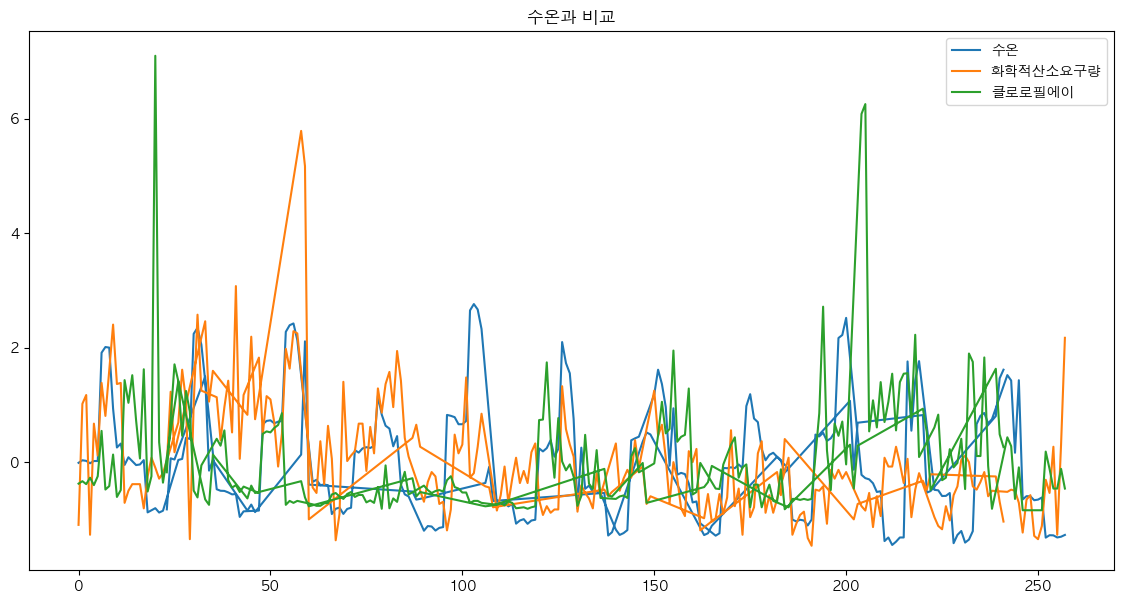

In [56]:
plt.figure(figsize=(14, 7))
plt.plot(jocheon['수온'], label='수온')
#plt.plot(jeju['날씨_맑음'], label='날씨_맑음')
plt.plot(jocheon['화학적산소요구량'], label='화학적산소요구량')
plt.plot(jocheon['클로로필에이'], label='클로로필에이')

plt.title('수온과 비교')

plt.legend()
plt.show()

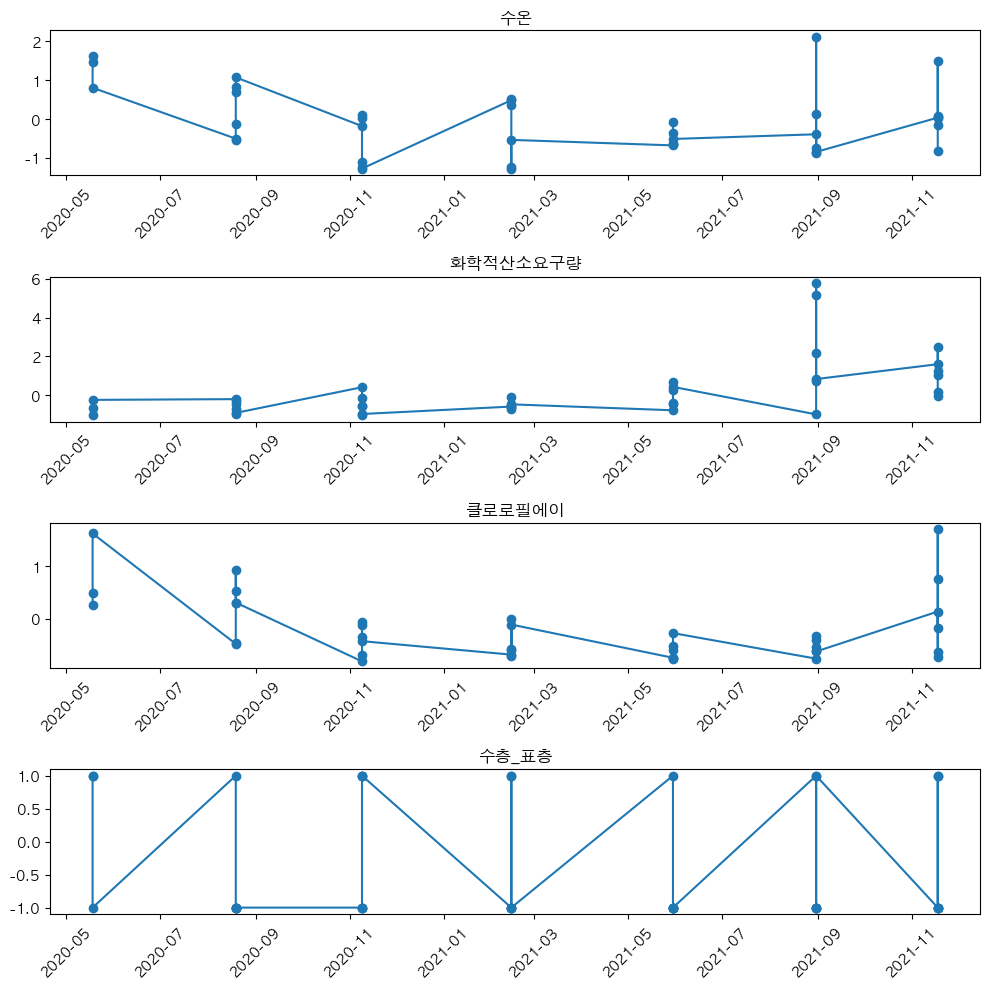

In [57]:
new_col = ['수온', '화학적산소요구량','클로로필에이','수층_표층']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(jocheon['측정 일자'], jocheon[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
